In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import re
import os
script_dir = os.path.split(os.getcwd())[0] + '/' + os.path.split(os.getcwd())[1]

import matplotlib.patches as mpatches
mpl.rcParams['xtick.labelsize'] = 40
mpl.rcParams['ytick.labelsize'] = 40

In [2]:
file = open( script_dir +"/Result/"+ "attention-e512-r1024-adadelta_1e+00-bs80-bleu-each5000_do_d0.0-gc1-init_xavier-s1234.1.log", "rb" )
array = []

for line_ in file:
    line = line_.strip()
    
    if line == "":
        continue
    line = str(line)
    
    m = re.search('Epoch:(.+?)update(.+?)cost', line)
    if m:
        a = [s for s in line.split()]
        array.append([ int(a[3][:-1]), float(a[5][0:8]) ])
        
array_baseline = []
for i in array:
    if i[0] >= 5010:
        for a in range(10):
            array_baseline.append(i[1])
data_baseline = pd.DataFrame(data=array_baseline, columns=['Loss'])


# Discriminator strategy

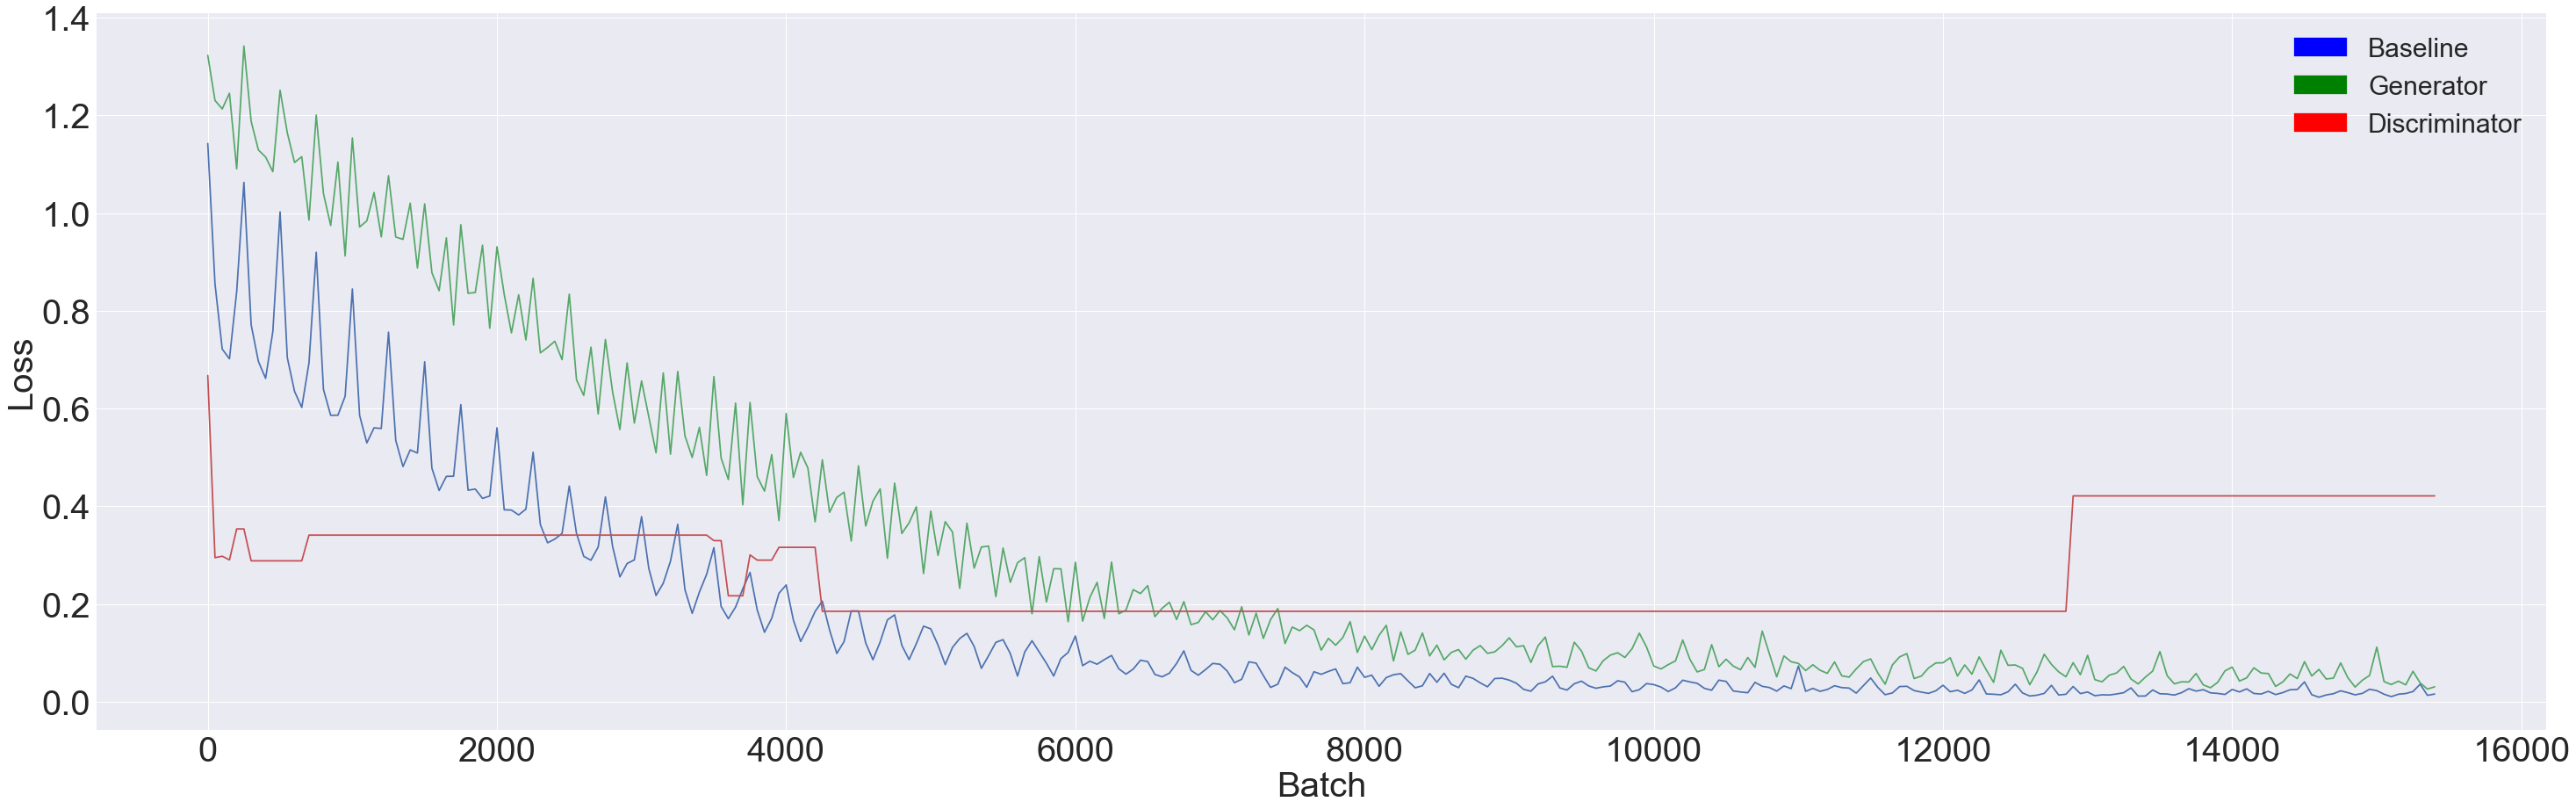

In [3]:
file = open( script_dir +"/Result/"+ "attention_GAN-e512-i512-o512-r1024-adadelta_1e+00-bs80-bleu-each100_do_d0.0-gc1-init_xavier-s1234.9.log", "rb" )

array_generator = []
array_discriminator = []

for line_ in file:
    line = line_.strip()
    
    if line == "":
        continue
    line = str(line)
    
    if "Loss Generator" in line:
        a = [s for s in line.split()]
        array_generator.append([float(a[2][0:8]) ] )
        
    if "Discriminator: Epoch:" in line:
        a = [s for s in line.split()]
        array_discriminator.append([ int(a[4][:-1]), float(a[6][0:8])   ])

data_generator = pd.DataFrame(data=array_generator, columns=['Loss'] )

data_discriminator = pd.DataFrame(data=array_discriminator, columns=['Batch', 'Loss'] )

loss_discriminator = 0
for i in range(2,len(data_generator)+1,1):
    if data_discriminator.loc[data_discriminator['Batch'] == i, 'Loss'].empty:
        loss_discriminator = data_discriminator.loc[data_discriminator['Batch'] == i-1, ['Loss'] ].values[0][0]
        df2 = pd.DataFrame([ [i, loss_discriminator]] , columns=['Batch', 'Loss'] )
        data_discriminator = data_discriminator.append(df2, ignore_index=True)

data_discriminator = data_discriminator.sort_values(['Batch'])
data_discriminator = data_discriminator.reset_index(drop=True)

#data_mean = (data_generator + data_baseline[0:7890])/2

#--------------------------
step = 50
index = [i for i in range(0,len(array_generator),step)]
data_generator_ = data_generator.ix[index]
data_discriminator_ = data_discriminator.ix[index]
data_ = data_baseline.ix[index]
#data_mean_ = data_mean.ix[index]

f , ax = plt.subplots(figsize=(50, 15))

pylab.ylabel('Loss',fontsize=40)
pylab.xlabel('Batch',fontsize=40)


plt.plot(data_.Loss)
plt.plot(data_generator_.Loss)
plt.plot(data_discriminator_.Loss)
#plt.plot(data_mean_.Loss)

blue_patch = mpatches.Patch(color='blue', label='Baseline')
green_patch = mpatches.Patch(color='green', label='Generator')
red_patch = mpatches.Patch(color='red', label='Discriminator')
plt.legend(handles=[blue_patch, green_patch, red_patch], prop={'size': 30})

plt.show()

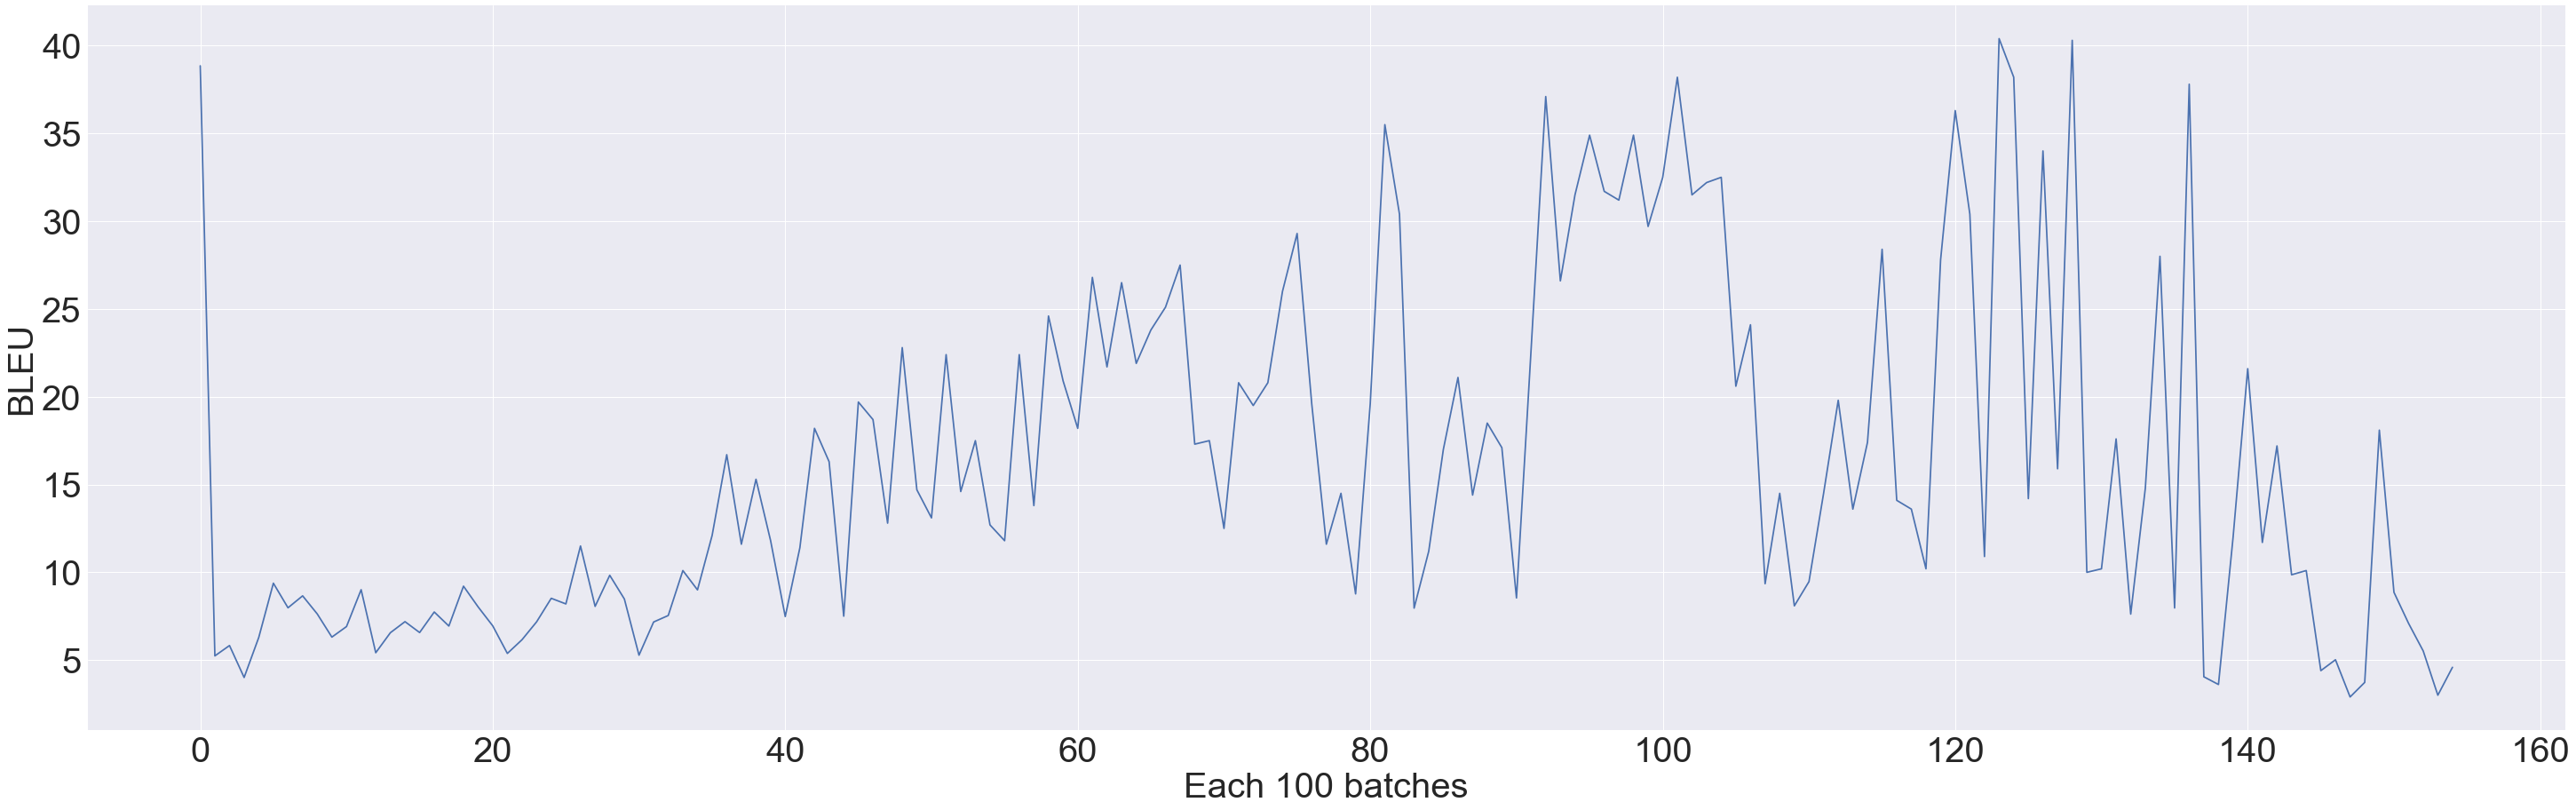

In [18]:
file = open( script_dir +"/Result/"+ "attention_GAN-e512-i512-o512-r1024-adadelta_1e+00-bs80-bleu-each100_do_d0.0-gc1-init_xavier-s1234.9.log", "rb" )
array = []
array.append(float(38.850) )
for line_ in file:
    line = line_.strip()
    
    if line == "":
        continue
    line = str(line)
    
    m = re.search('Validation(.+?) - BLEU =', line)
    if m:
        a = [s for s in line.split()]
        array.append(float(a[5][0:4]))


array = np.array(array)
data = pd.DataFrame(data=array, columns=['BLEU'] )

step = 1
index = [i for i in range(0,len(array),step)]
data_ = data.ix[index]

ax = plt.subplots(figsize=(50, 15))
plt.plot(data_.BLEU)

pylab.ylabel('BLEU',fontsize=40)
pylab.xlabel('Each 100 batches',fontsize=40)

plt.show()

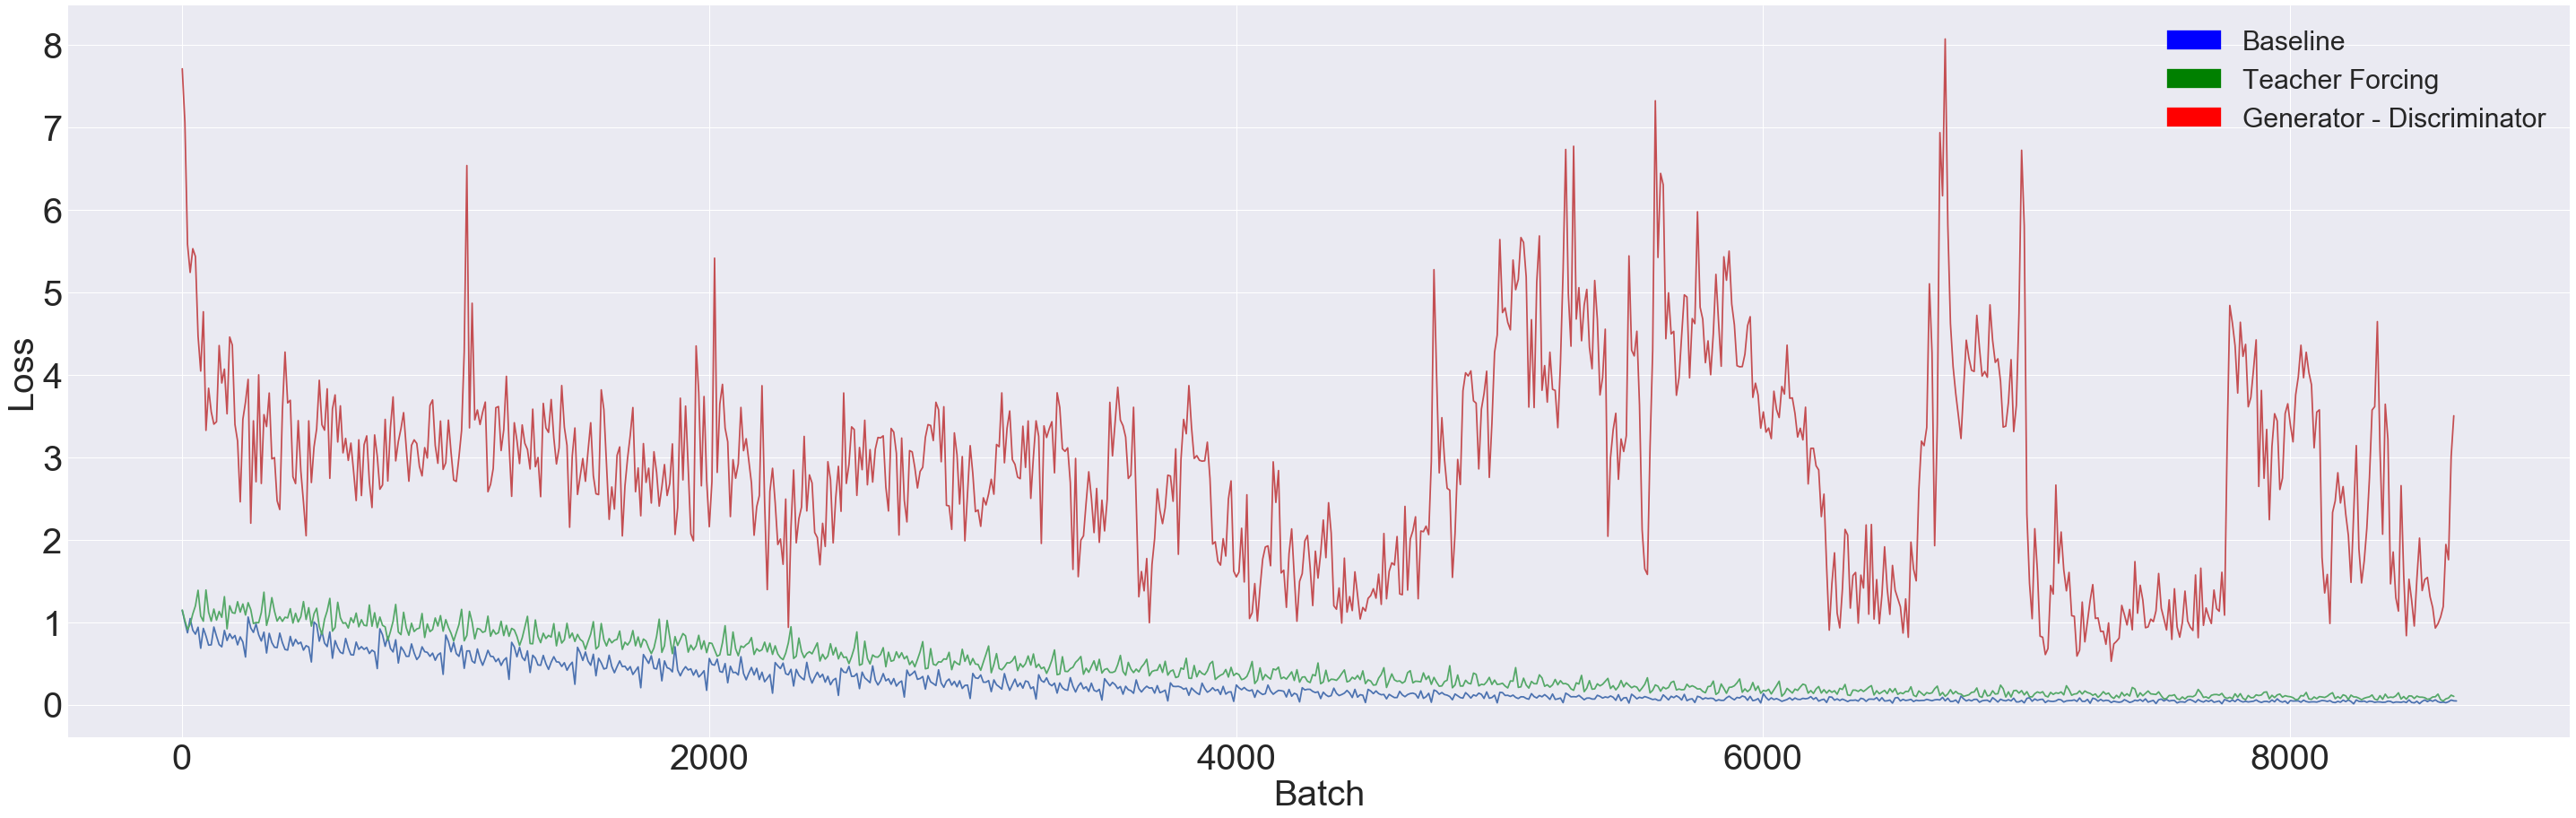

In [5]:
file = open( script_dir +"/Result/"+ "attention_test-e512-i512-o512-r1024-adadelta_1e+00-bs80-bleu-each100_do_d0.0-gc1-init_xavier-s1234.18.log", "rb" )

array_generator_G = []
array_generator_D = []
array_discriminator = []

for line_ in file:
    line = line_.strip()
    
    if line == "":
        continue
    line = str(line)
    
    if "Loss Generator P" in line:
        a = [s for s in line.split()]
        array_generator_G.append([float(a[3][0:8]) ] )
        
    if "Loss Generator D" in line:
        a = [s for s in line.split()]
        array_generator_D.append([float(a[3][0:8]) ] )
        
    if "Discriminator: Epoch:" in line:
        a = [s for s in line.split()]
        array_discriminator.append([ int(a[4][:-1]), float(a[6][0:8])   ])
        
    

data_generator_G = pd.DataFrame(data=array_generator_G, columns=['Loss'] )
data_generator_D = pd.DataFrame(data=array_generator_D, columns=['Loss'] )

data_discriminator = pd.DataFrame(data=array_discriminator, columns=['Batch', 'Loss'] )


loss_discriminator = 0
for i in range(2,len(array_generator_G)+1,1):
    if data_discriminator.loc[data_discriminator['Batch'] == i, 'Loss'].empty:
        loss_discriminator = data_discriminator.loc[data_discriminator['Batch'] == i-1, ['Loss'] ].values[0][0]
        df2 = pd.DataFrame([ [i, loss_discriminator]] , columns=['Batch', 'Loss'] )
        data_discriminator = data_discriminator.append(df2, ignore_index=True)

data_discriminator = data_discriminator.sort_values(['Batch'])
data_discriminator = data_discriminator.reset_index(drop=True)

#-------------------------------------
step = 10
index = [i for i in range(1,len(array_generator_G)+1,step)]
data_generator_G_ = data_generator_G.ix[index]
data_generator_D_ = data_generator_D.ix[index]
data_discriminator_ = data_discriminator.ix[index]
data_ = data_baseline.ix[index]

f , ax = plt.subplots(figsize=(50, 15))

pylab.ylabel('Loss',fontsize=40)
pylab.xlabel('Batch',fontsize=40)

plt.plot(data_.Loss)
plt.plot(data_generator_G_.Loss)
plt.plot(data_generator_D_.Loss)


blue_patch = mpatches.Patch(color='blue', label='Baseline')
green_patch = mpatches.Patch(color='green', label='Teacher Forcing')
red_patch = mpatches.Patch(color='red', label='Generator - Discriminator')

plt.legend(handles=[blue_patch, green_patch,red_patch], prop={'size': 30})


plt.show()

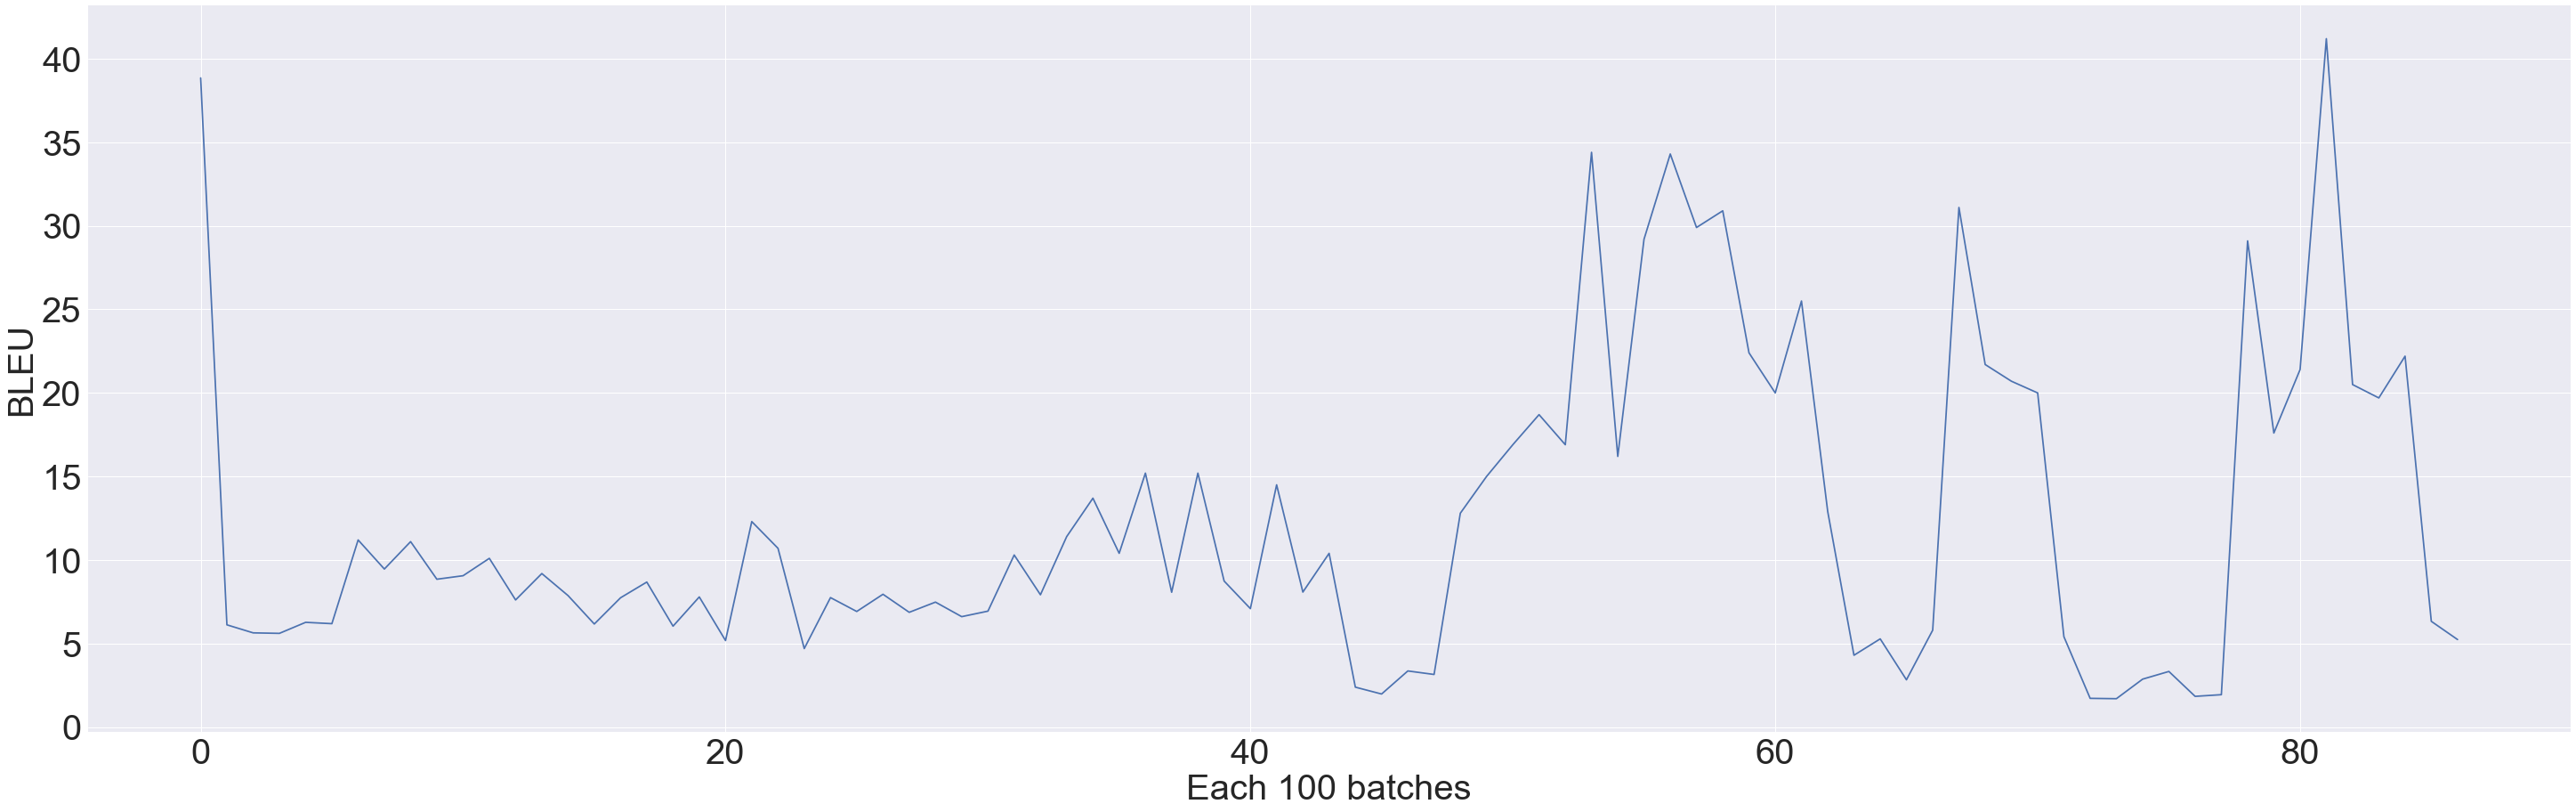

In [15]:
file = open( script_dir +"/Result/"+ "attention_test-e512-i512-o512-r1024-adadelta_1e+00-bs80-bleu-each100_do_d0.0-gc1-init_xavier-s1234.18.log", "rb" )
array = []
array.append(float(38.850) )
for line_ in file:
    line = line_.strip()
    
    if line == "":
        continue
    line = str(line)
    
    m = re.search('Validation(.+?) - BLEU =', line)
    if m:
        a = [s for s in line.split()]
        array.append(float(a[5][0:4]))


array = np.array(array)
data = pd.DataFrame(data=array, columns=['BLEU'] )


step = 1
index = [i for i in range(0,len(array),step)]
data_ = data.ix[index]

ax = plt.subplots(figsize=(50, 15))
plt.plot(data_.BLEU)

pylab.ylabel('BLEU',fontsize=40)
pylab.xlabel('Each 100 batches',fontsize=40)

plt.show()

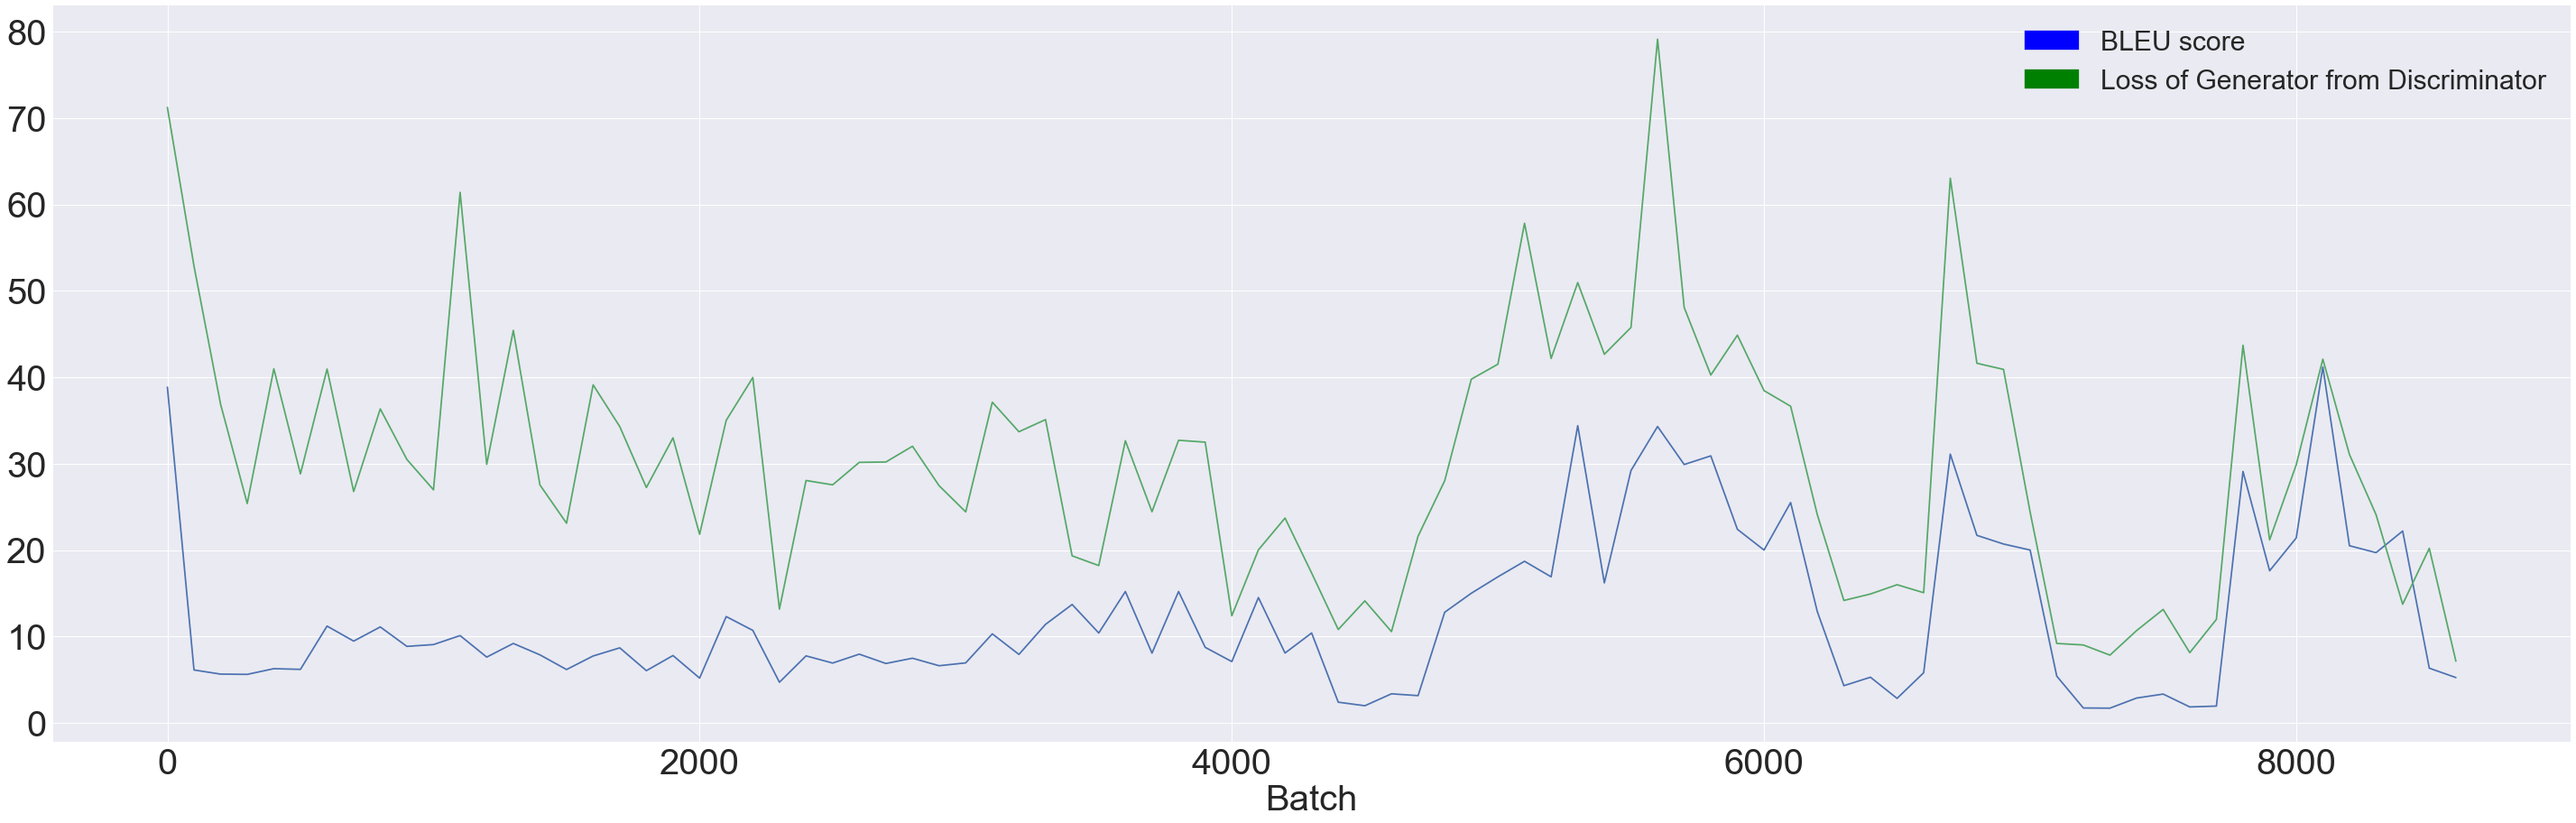

In [7]:
file = open( script_dir +"/Result/"+ "attention_test-e512-i512-o512-r1024-adadelta_1e+00-bs80-bleu-each100_do_d0.0-gc1-init_xavier-s1234.18.log", "rb" )


array_generator_D = []
array_BLEU = []


for line_ in file:
    line = line_.strip()
    
    if line == "":
        continue
    line = str(line)
        
    if "Loss Generator D" in line:
        a = [s for s in line.split()]
        array_generator_D.append([float(a[3][0:8]) * 10 ] )
        
    m = re.search('Validation(.+?) - BLEU =', line)
    if m:
        a = [s for s in line.split()]
        array_BLEU.append(float(a[5][0:4]))
        
data_generator_D = pd.DataFrame(data=array_generator_D, columns=['Loss'] )


array_BLEU_ = []
array_BLEU_.append(float(38.850) )
for b in array_BLEU:
    for e in range(0,100):
        array_BLEU_.append(b)

data_BLEU = pd.DataFrame(data=array_BLEU_, columns=['Loss'] )

#-------------------------------------
step = 100
index = [i for i in range(0,len(data_generator_D)+1,step)]
data_generator_D_ = data_generator_D.ix[index]
data_BLEU_ = data_BLEU.ix[index]

f , ax = plt.subplots(figsize=(50, 15))

pylab.ylabel('',fontsize=40)
pylab.xlabel('Batch',fontsize=40)

plt.plot(data_BLEU_.Loss)
plt.plot(data_generator_D_.Loss)


blue_patch = mpatches.Patch(color='blue', label='BLEU score')
green_patch = mpatches.Patch(color='green', label='Loss of Generator from Discriminator')


plt.legend(handles=[blue_patch, green_patch], prop={'size': 30})


plt.show()

# Discriminator and LM strategy

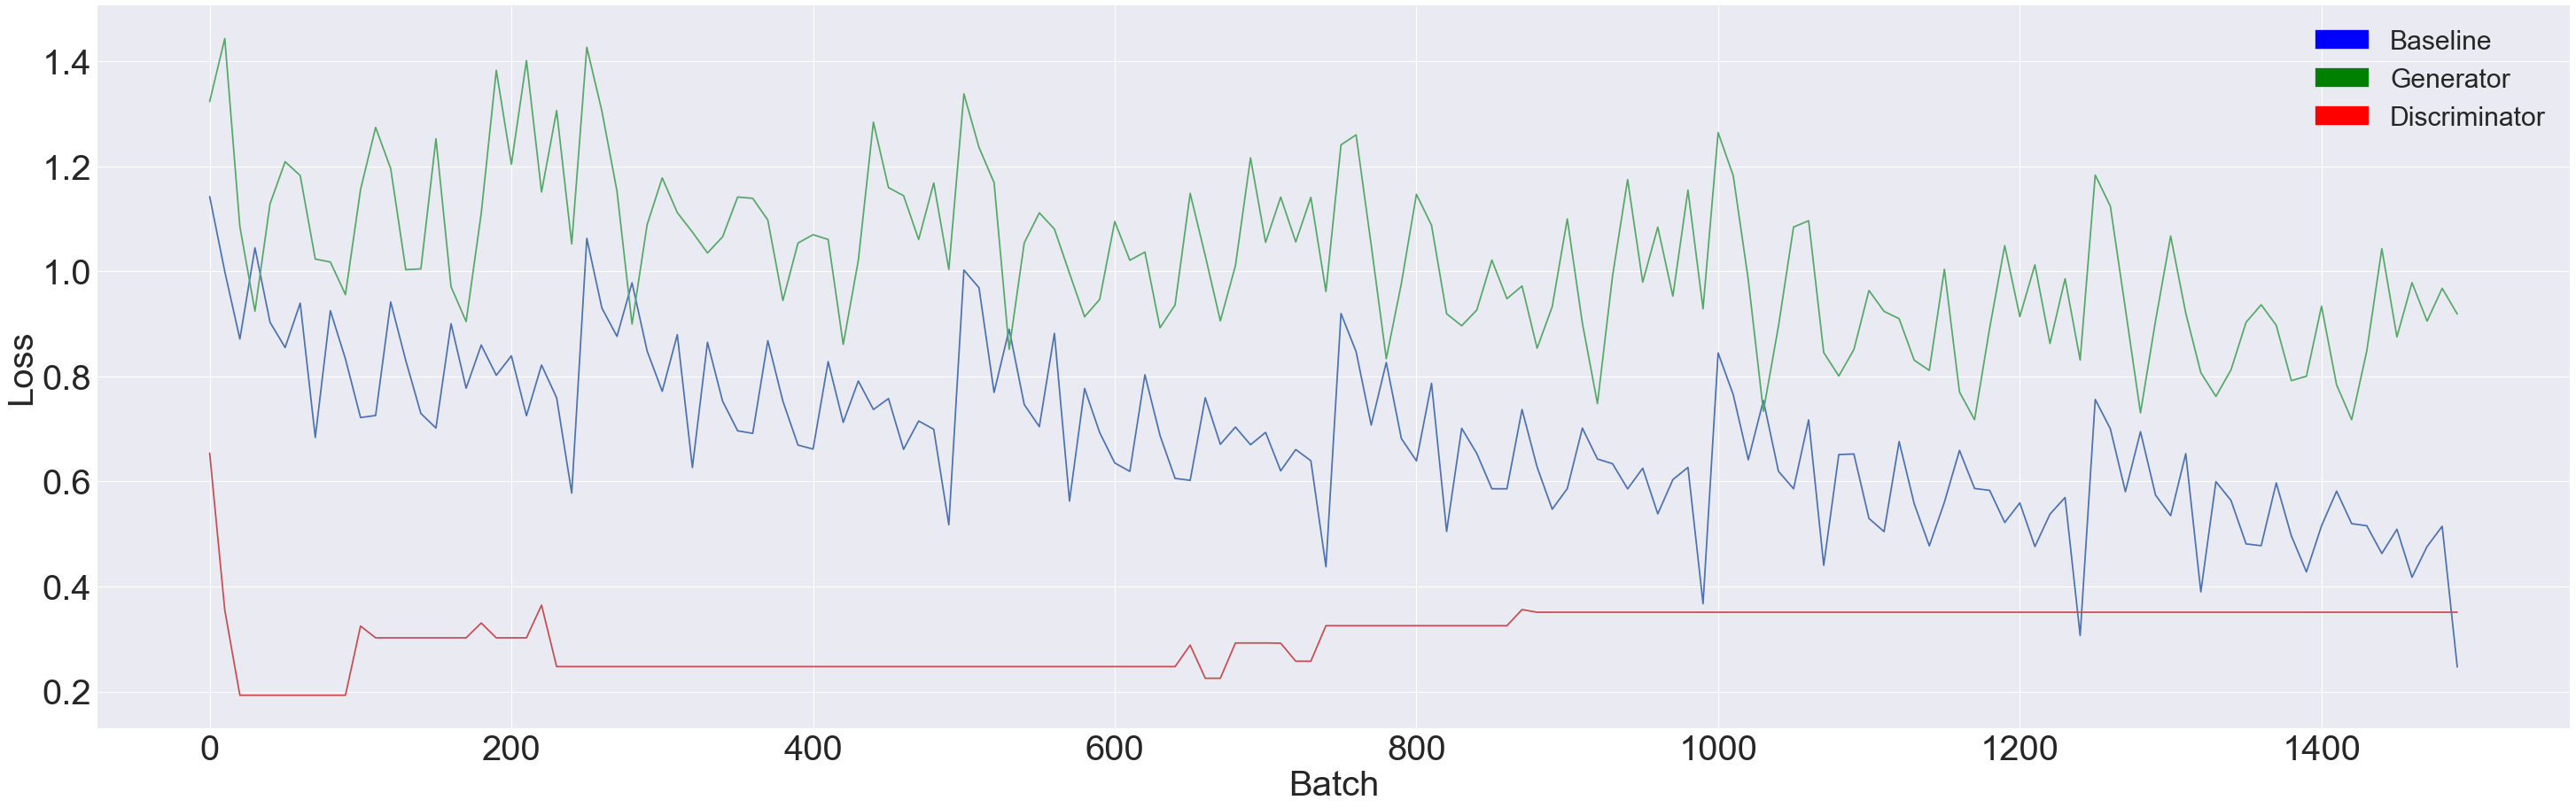

In [8]:
file = open( script_dir +"/Result/"+ "attention_GAN_LM-e512-i512-o512-r1024-adadelta_1e+00-bs80-bleu-each100_do_d0.0-gc1-init_xavier-s1234.2.log", "rb" )

array_generator = []
array_discriminator = []

for line_ in file:
    line = line_.strip()
    
    if line == "":
        continue
    line = str(line)
    
    if "Loss Generator P" in line:
        a = [s for s in line.split()]
        array_generator.append([float(a[3][0:8]) ] )
        
    if "Discriminator: Epoch:" in line:
        a = [s for s in line.split()]
        array_discriminator.append([ int(a[4][:-1]), float(a[6][0:8])   ])

data_generator = pd.DataFrame(data=array_generator, columns=['Loss'] )

data_discriminator = pd.DataFrame(data=array_discriminator, columns=['Batch', 'Loss'] )

loss_discriminator = 0
for i in range(2,len(data_generator)+1,1):
    if data_discriminator.loc[data_discriminator['Batch'] == i, 'Loss'].empty:
        loss_discriminator = data_discriminator.loc[data_discriminator['Batch'] == i-1, ['Loss'] ].values[0][0]
        df2 = pd.DataFrame([ [i, loss_discriminator]] , columns=['Batch', 'Loss'] )
        data_discriminator = data_discriminator.append(df2, ignore_index=True)

data_discriminator = data_discriminator.sort_values(['Batch'])
data_discriminator = data_discriminator.reset_index(drop=True)

#data_mean = (data_generator + data_baseline[0:7890])/2

#--------------------------
step = 10
index = [i for i in range(0,1500,step)]
data_generator_ = data_generator.ix[index]
data_discriminator_ = data_discriminator.ix[index]
data_ = data_baseline.ix[index]
#data_mean_ = data_mean.ix[index]

f , ax = plt.subplots(figsize=(50, 15))

pylab.ylabel('Loss',fontsize=40)
pylab.xlabel('Batch',fontsize=40)


plt.plot(data_.Loss)
plt.plot(data_generator_.Loss)
plt.plot(data_discriminator_.Loss)
#plt.plot(data_mean_.Loss)

blue_patch = mpatches.Patch(color='blue', label='Baseline')
green_patch = mpatches.Patch(color='green', label='Generator')
red_patch = mpatches.Patch(color='red', label='Discriminator')
plt.legend(handles=[blue_patch, green_patch, red_patch], prop={'size': 30})

plt.show()

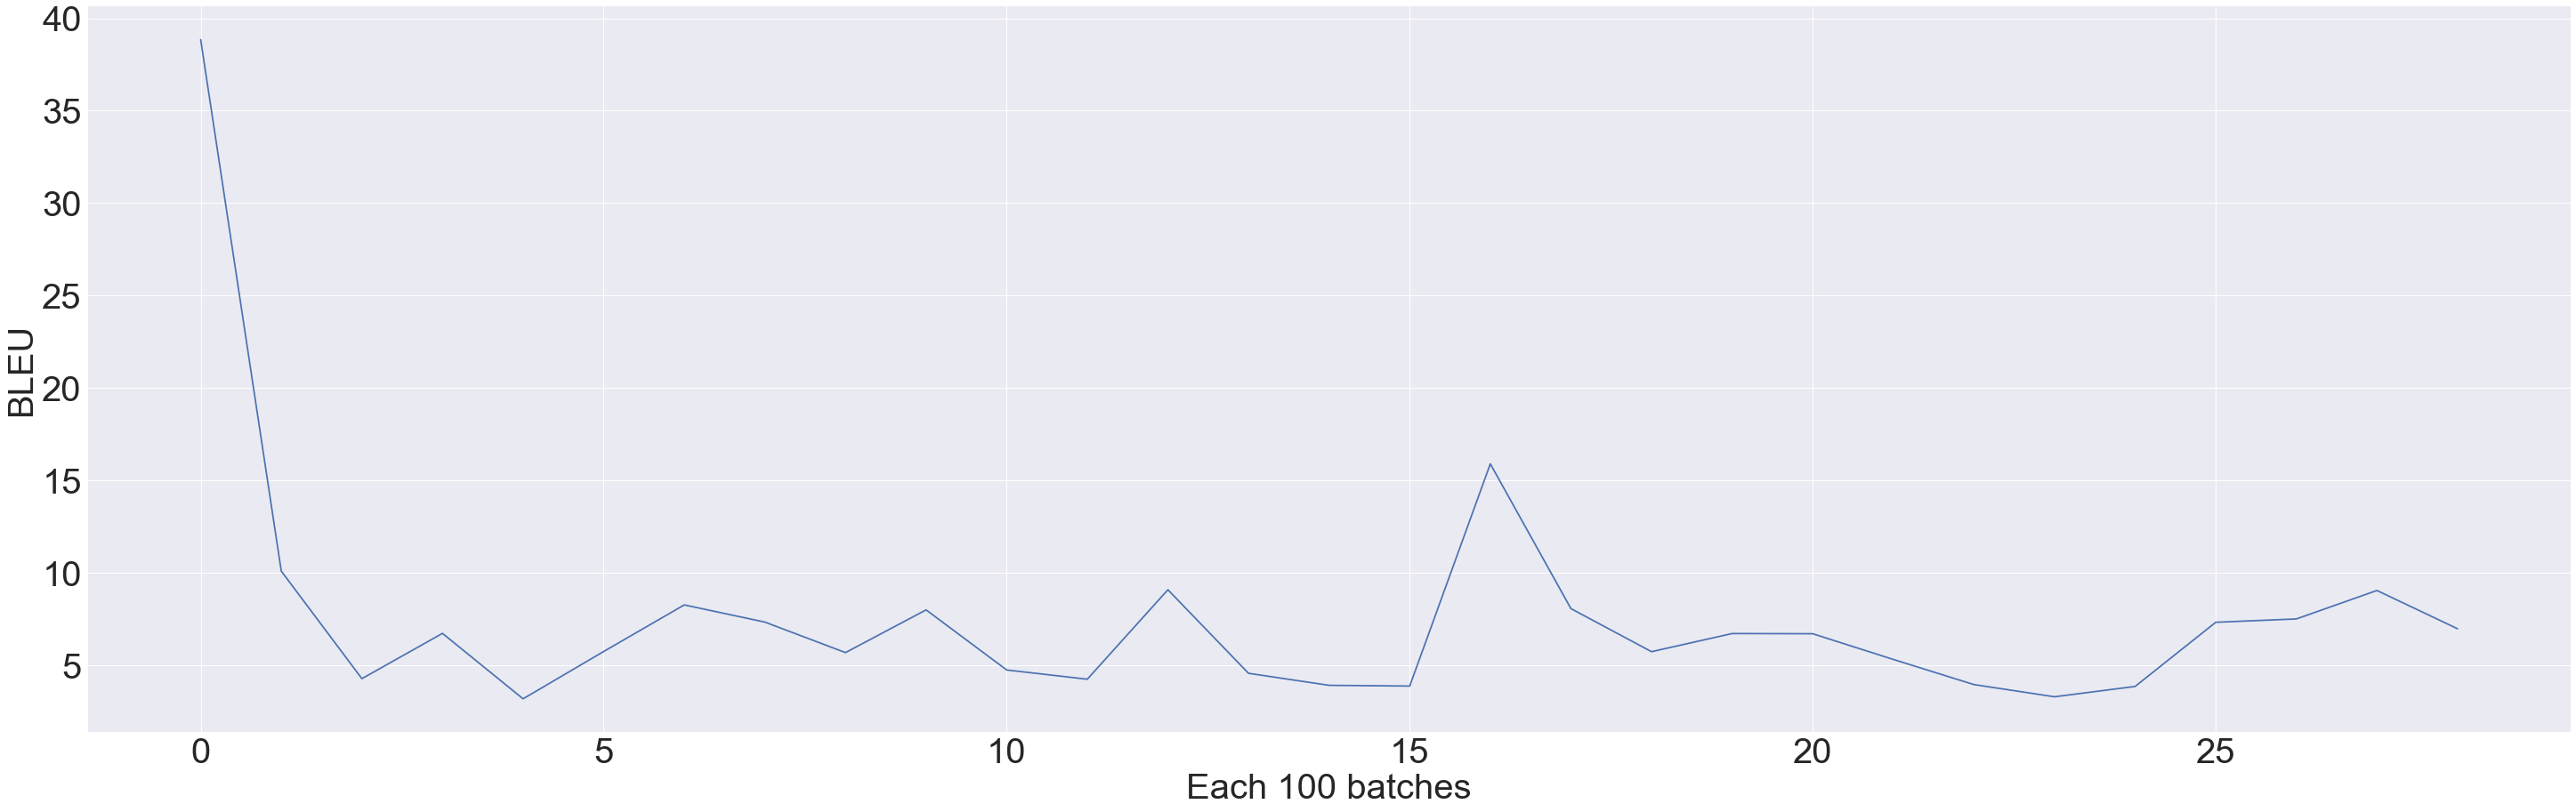

In [9]:
file = open( script_dir +"/Result/"+ "attention_GAN_LM-e512-i512-o512-r1024-adadelta_1e+00-bs80-bleu-each100_do_d0.0-gc1-init_xavier-s1234.2.log", "rb" )
array = []
array.append(float(38.850) )
for line_ in file:
    line = line_.strip()
    
    if line == "":
        continue
    line = str(line)
    
    m = re.search('Validation(.+?) - BLEU =', line)
    if m:
        a = [s for s in line.split()]
        array.append(float(a[5][0:4]))


array = np.array(array)
data = pd.DataFrame(data=array, columns=['BLEU'] )

step = 1
index = [i for i in range(0,len(array),step)]
data_ = data.ix[index]

ax = plt.subplots(figsize=(50, 15))
plt.plot(data_.BLEU)

pylab.ylabel('BLEU',fontsize=40)
pylab.xlabel('Each 100 batches',fontsize=40)

plt.show()

# Language model strategy

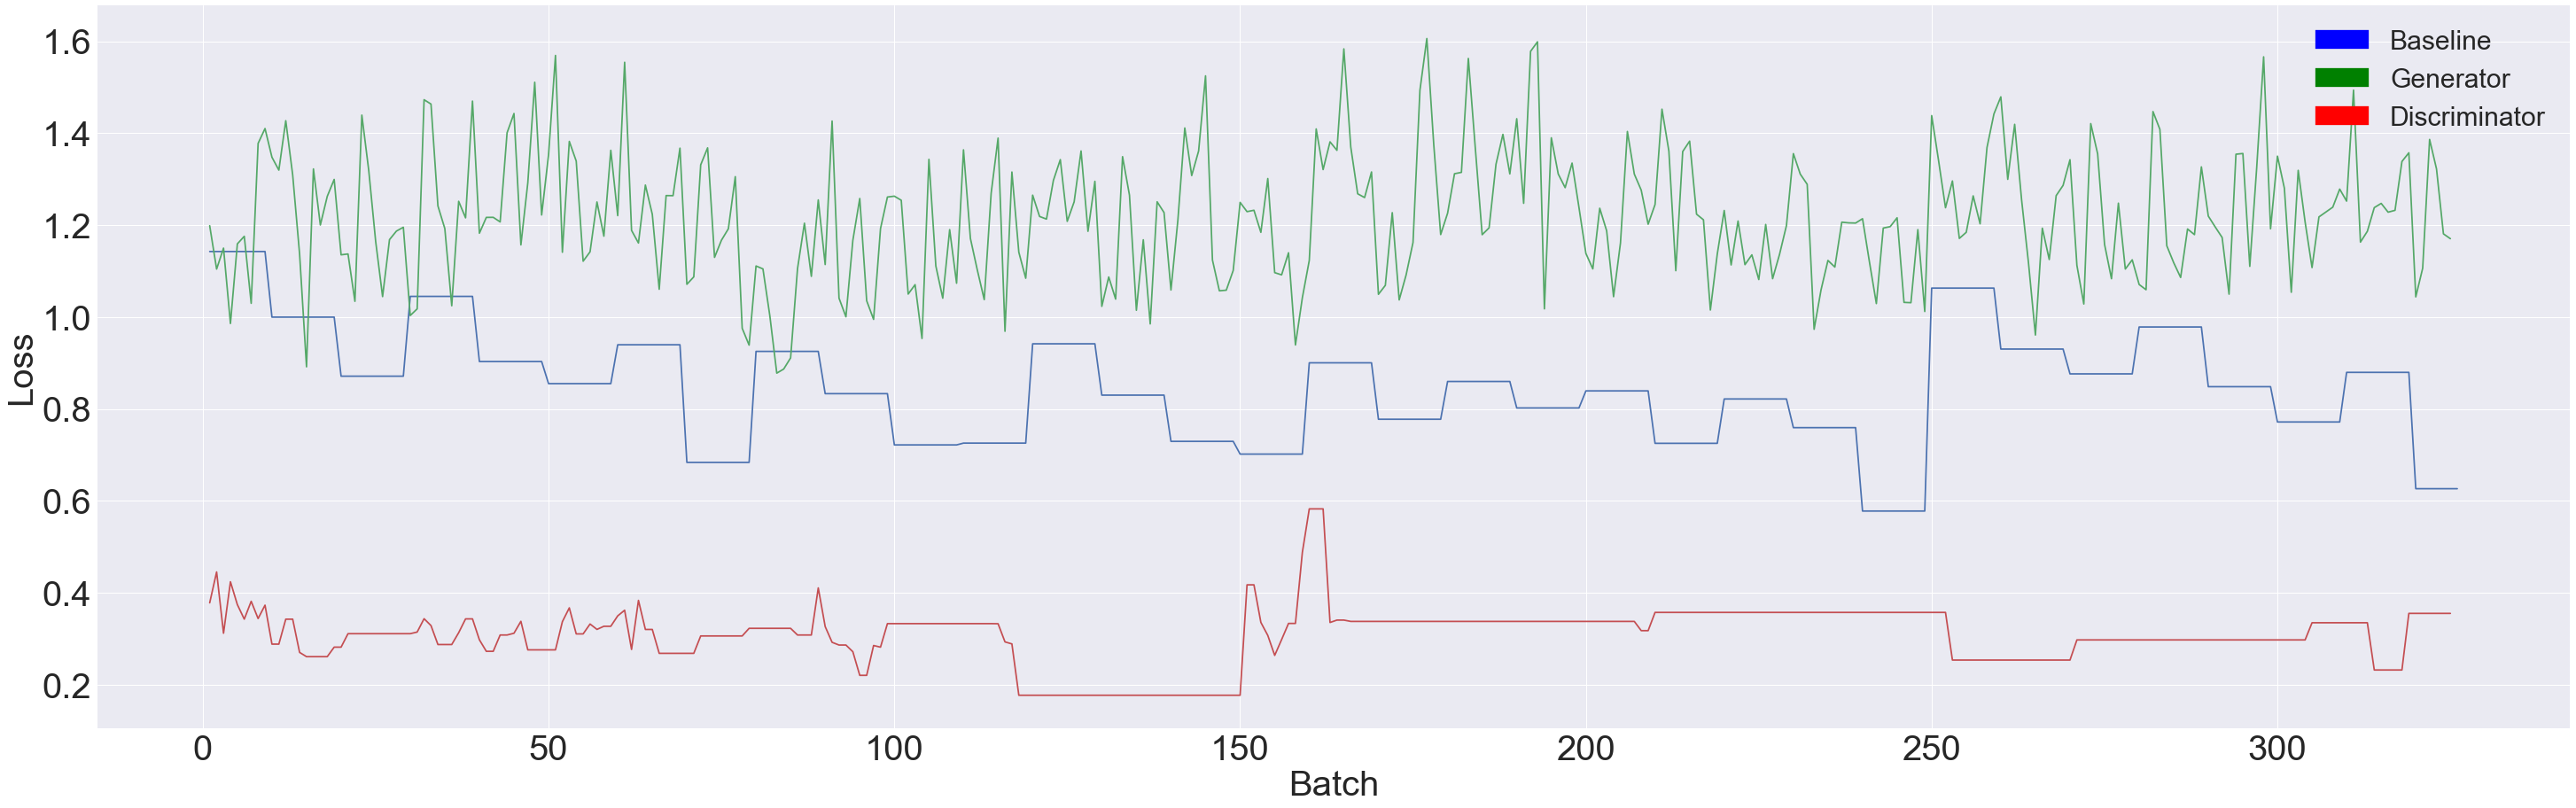

In [10]:
file = open( script_dir +"/Result/"+ "attention_GAN-e512-i512-o512-r1024-adadelta_1e+00-bs80-bleu-each100_do_d0.0-gc1-init_xavier-s1234.7_LM.log", "rb" )

array_generator = []
array_discriminator = []

for line_ in file:
    line = line_.strip()
    
    if line == "":
        continue
    line = str(line)
    
    if "Loss Generator" in line:
        a = [s for s in line.split()]
        array_generator.append([float(a[2][0:8]) ] )
        
    if "Discriminator: Epoch:" in line:
        a = [s for s in line.split()]
        array_discriminator.append([ int(a[4][:-1]), float(a[6][0:8])   ])

data_generator = pd.DataFrame(data=array_generator, columns=['Loss'] )

data_discriminator = pd.DataFrame(data=array_discriminator, columns=['Batch', 'Loss'] )

loss_discriminator = 0
for i in range(1,len(data_generator)+1,1):
    if data_discriminator.loc[data_discriminator['Batch'] == i, 'Loss'].empty:
        loss_discriminator = data_discriminator.loc[data_discriminator['Batch'] == i-1, ['Loss'] ].values[0][0]
        df2 = pd.DataFrame([ [i, loss_discriminator]] , columns=['Batch', 'Loss'] )
        data_discriminator = data_discriminator.append(df2, ignore_index=True)

data_discriminator = data_discriminator.sort_values(['Batch'])
data_discriminator = data_discriminator.reset_index(drop=True)

step = 1
index = [i for i in range(1,len(array_generator)+1,step)]
data_generator_ = data_generator.ix[index]
data_discriminator_ = data_discriminator.ix[index]
data_ = data_baseline.ix[index]

f , ax = plt.subplots(figsize=(50, 15))

pylab.ylabel('Loss',fontsize=40)
pylab.xlabel('Batch',fontsize=40)

plt.plot(data_.Loss)
plt.plot(data_generator_.Loss)
plt.plot(data_discriminator_.Loss)

blue_patch = mpatches.Patch(color='blue', label='Baseline')
green_patch = mpatches.Patch(color='green', label='Generator')
red_patch = mpatches.Patch(color='red', label='Discriminator')
plt.legend(handles=[blue_patch, green_patch, red_patch], prop={'size': 30})

plt.show()

    BLEU
0  38.85
1   7.26
2   3.86
3   4.90


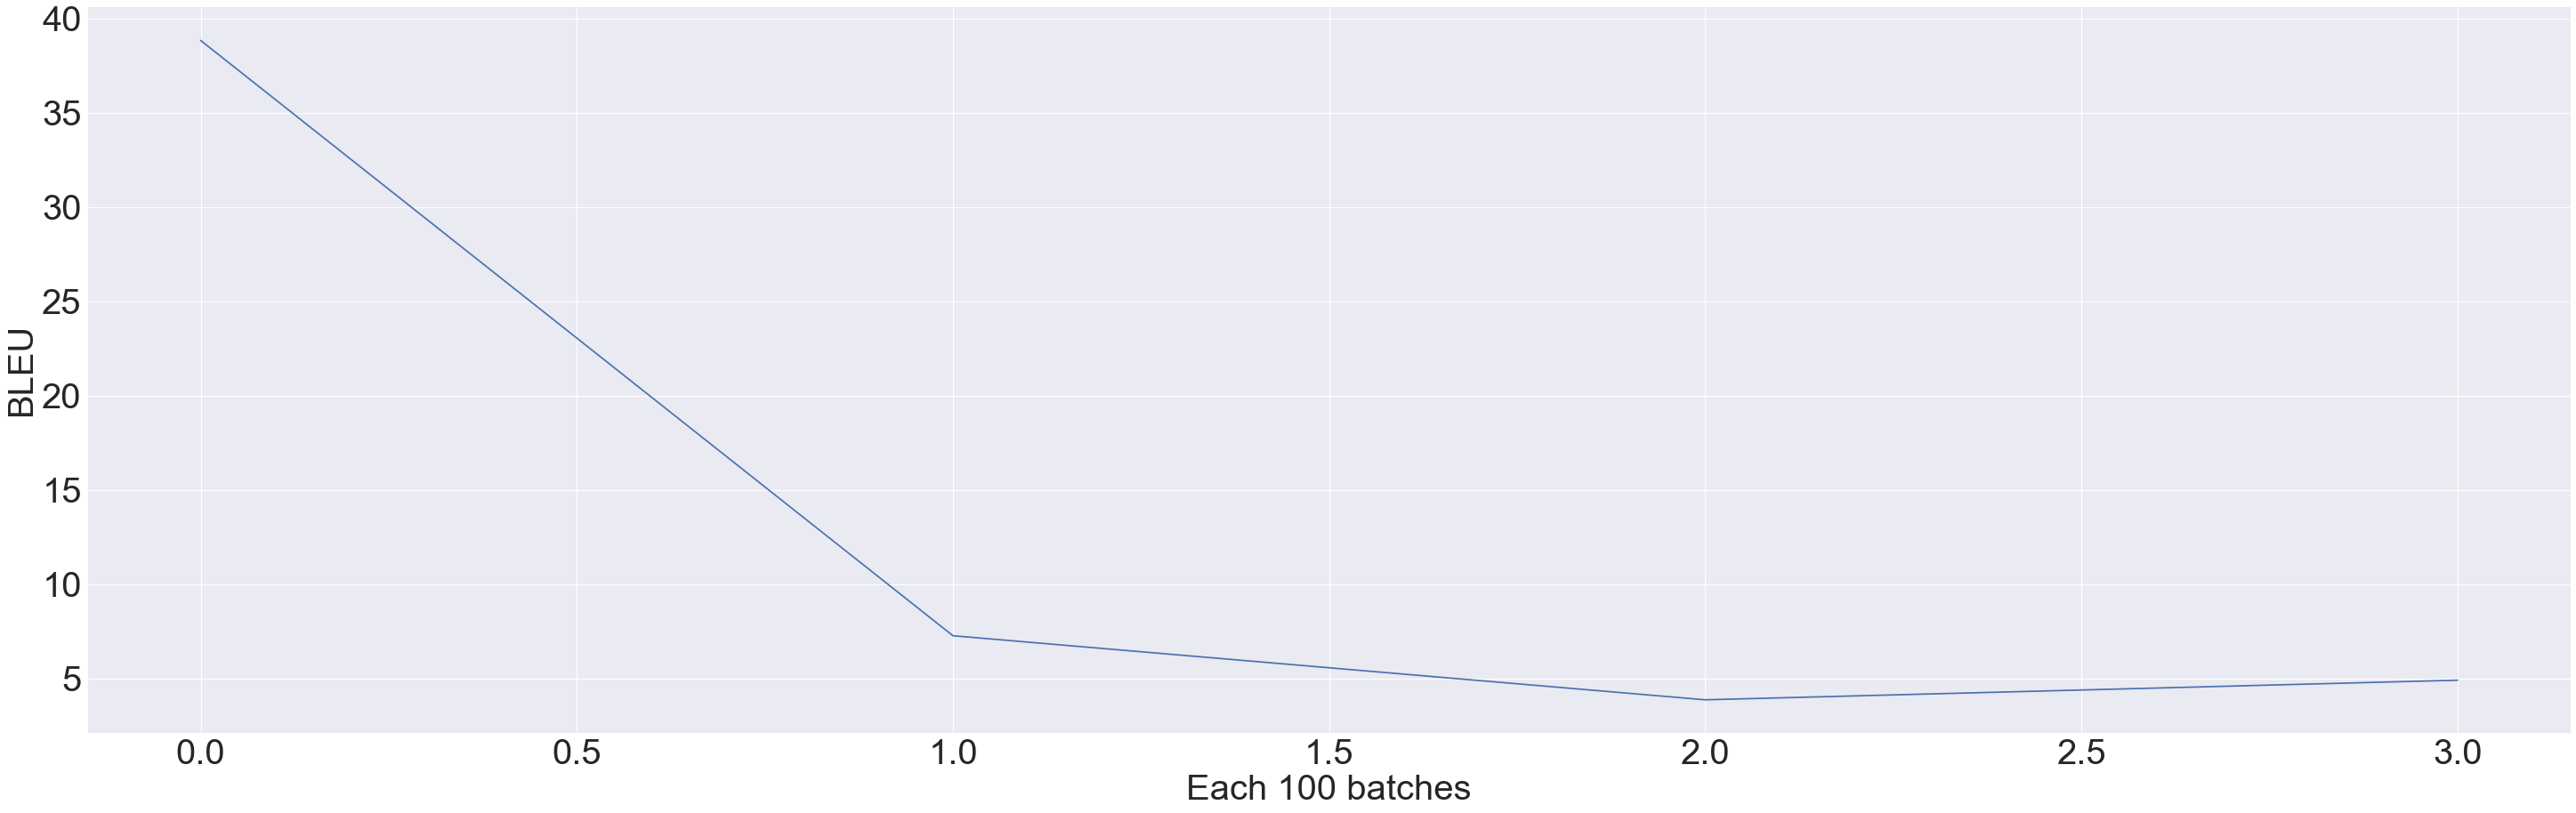

In [11]:
file = open( script_dir +"/Result/"+ "attention_GAN-e512-i512-o512-r1024-adadelta_1e+00-bs80-bleu-each100_do_d0.0-gc1-init_xavier-s1234.7_LM.log", "rb" )
array = []
array.append(float(38.850) )
for line_ in file:
    line = line_.strip()
    
    if line == "":
        continue
    line = str(line)
    
    m = re.search('Validation(.+?) - BLEU =', line)
    if m:
        a = [s for s in line.split()]
        array.append(float(a[5][0:4]))
        
array = np.array(array)
data = pd.DataFrame(data=array, columns=['BLEU'] )

print(data)
ax = plt.subplots(figsize=(50, 15))
plt.plot(data.BLEU)

pylab.ylabel('BLEU',fontsize=40)
pylab.xlabel('Each 100 batches',fontsize=40)
plt.show()

# Monte-Carlo search strategy

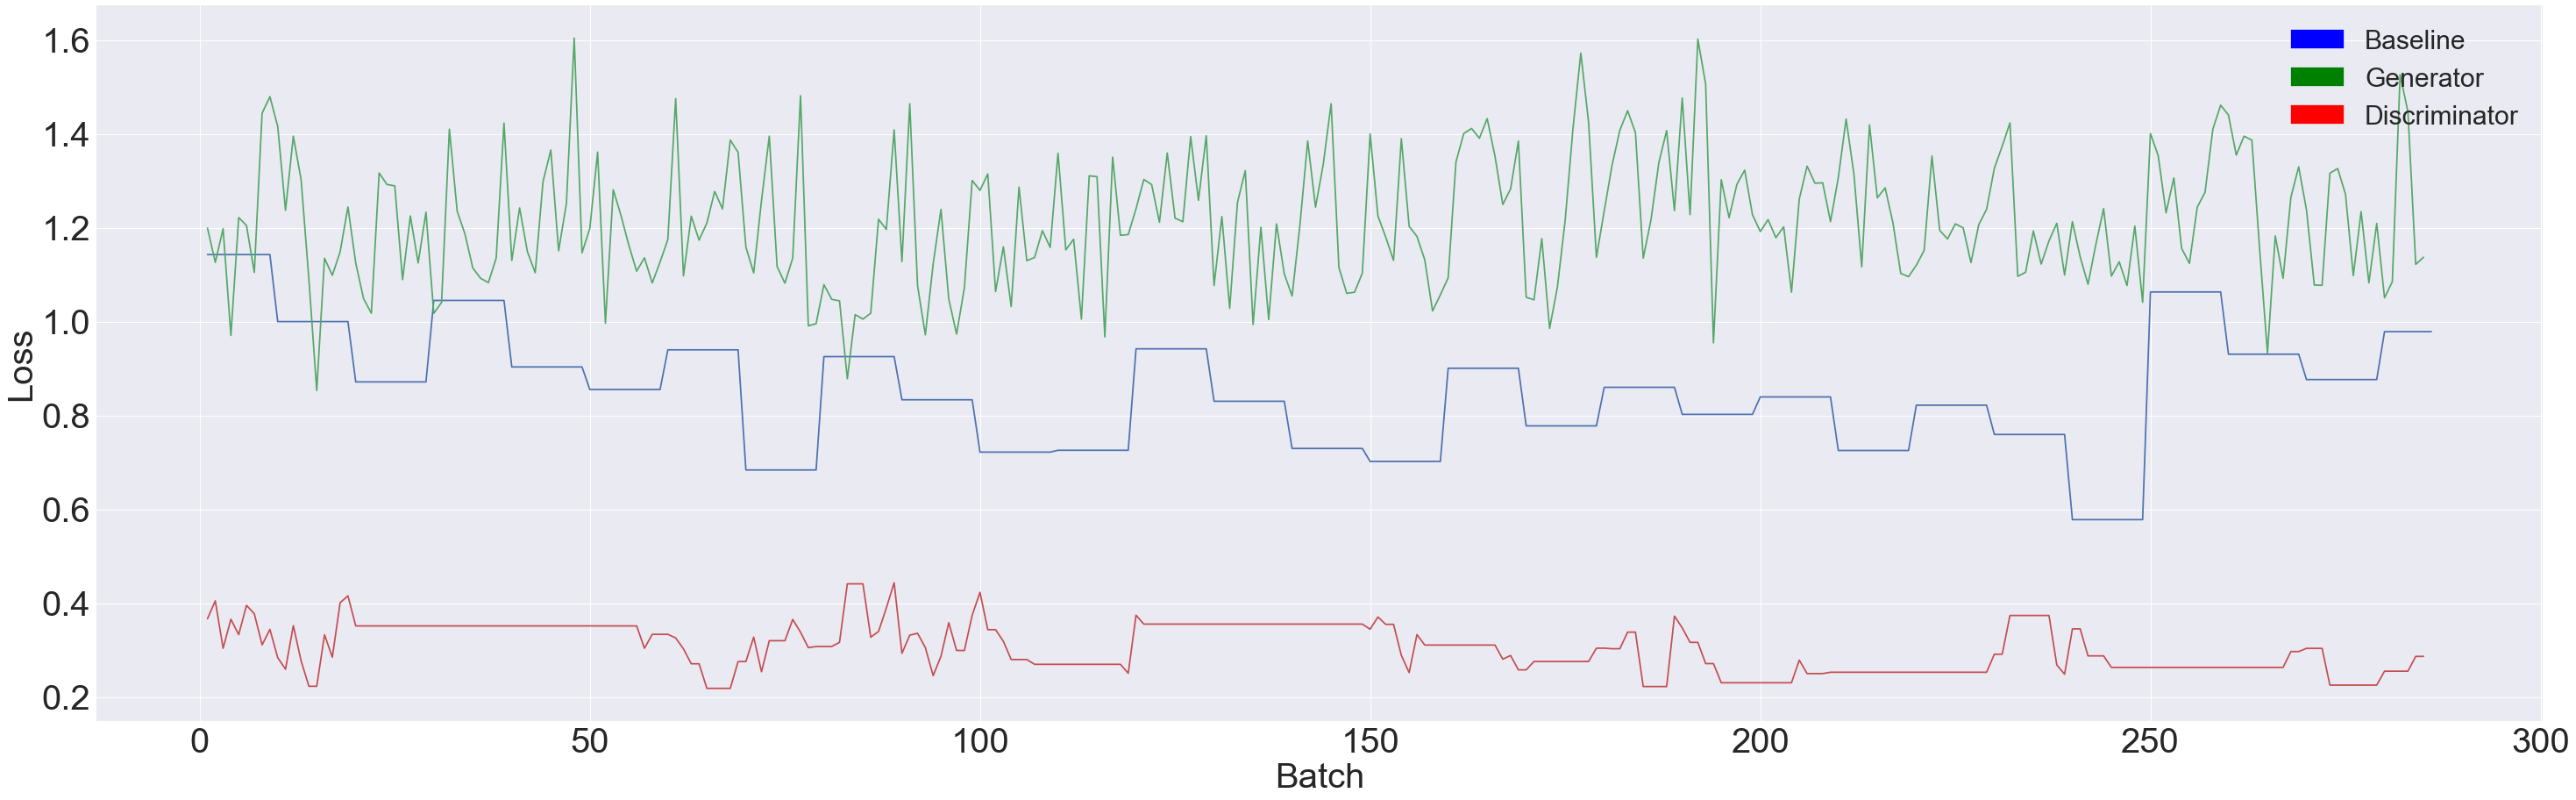

In [12]:
file = open( script_dir +"/Result/"+ "attention_GAN-e512-i512-o512-r1024-adadelta_1e+00-bs80-bleu-each100_do_d0.0-gc1-init_xavier-s1234.7.log", "rb" )

array_generator = []
array_discriminator = []

for line_ in file:
    line = line_.strip()
    
    if line == "":
        continue
    line = str(line)
    
    if "Loss Generator" in line:
        a = [s for s in line.split()]
        array_generator.append([float(a[2][0:8]) ] )
        
    if "Discriminator: Epoch:" in line:
        a = [s for s in line.split()]
        array_discriminator.append([ int(a[4][:-1]), float(a[6][0:8])   ])

data_generator = pd.DataFrame(data=array_generator, columns=['Loss'] )

data_discriminator = pd.DataFrame(data=array_discriminator, columns=['Batch', 'Loss'] )

loss_discriminator = 0
for i in range(1,len(data_generator)+1,1):
    if data_discriminator.loc[data_discriminator['Batch'] == i, 'Loss'].empty:
        loss_discriminator = data_discriminator.loc[data_discriminator['Batch'] == i-1, ['Loss'] ].values[0][0]
        df2 = pd.DataFrame([ [i, loss_discriminator]] , columns=['Batch', 'Loss'] )
        data_discriminator = data_discriminator.append(df2, ignore_index=True)

data_discriminator = data_discriminator.sort_values(['Batch'])
data_discriminator = data_discriminator.reset_index(drop=True)


step = 1
index = [i for i in range(1,len(array_generator)+1,step)]
data_generator_ = data_generator.ix[index]
data_discriminator_ = data_discriminator.ix[index]
data_ = data_baseline.ix[index]

f , ax = plt.subplots(figsize=(50, 15))

pylab.ylabel('Loss',fontsize=40)
pylab.xlabel('Batch',fontsize=40)

plt.plot(data_.Loss)
plt.plot(data_generator_.Loss)
plt.plot(data_discriminator_.Loss)

blue_patch = mpatches.Patch(color='blue', label='Baseline')
green_patch = mpatches.Patch(color='green', label='Generator')
red_patch = mpatches.Patch(color='red', label='Discriminator')
plt.legend(handles=[blue_patch, green_patch, red_patch], prop={'size': 30})

plt.show()

    BLEU
0  38.85
1   6.67
2   3.34


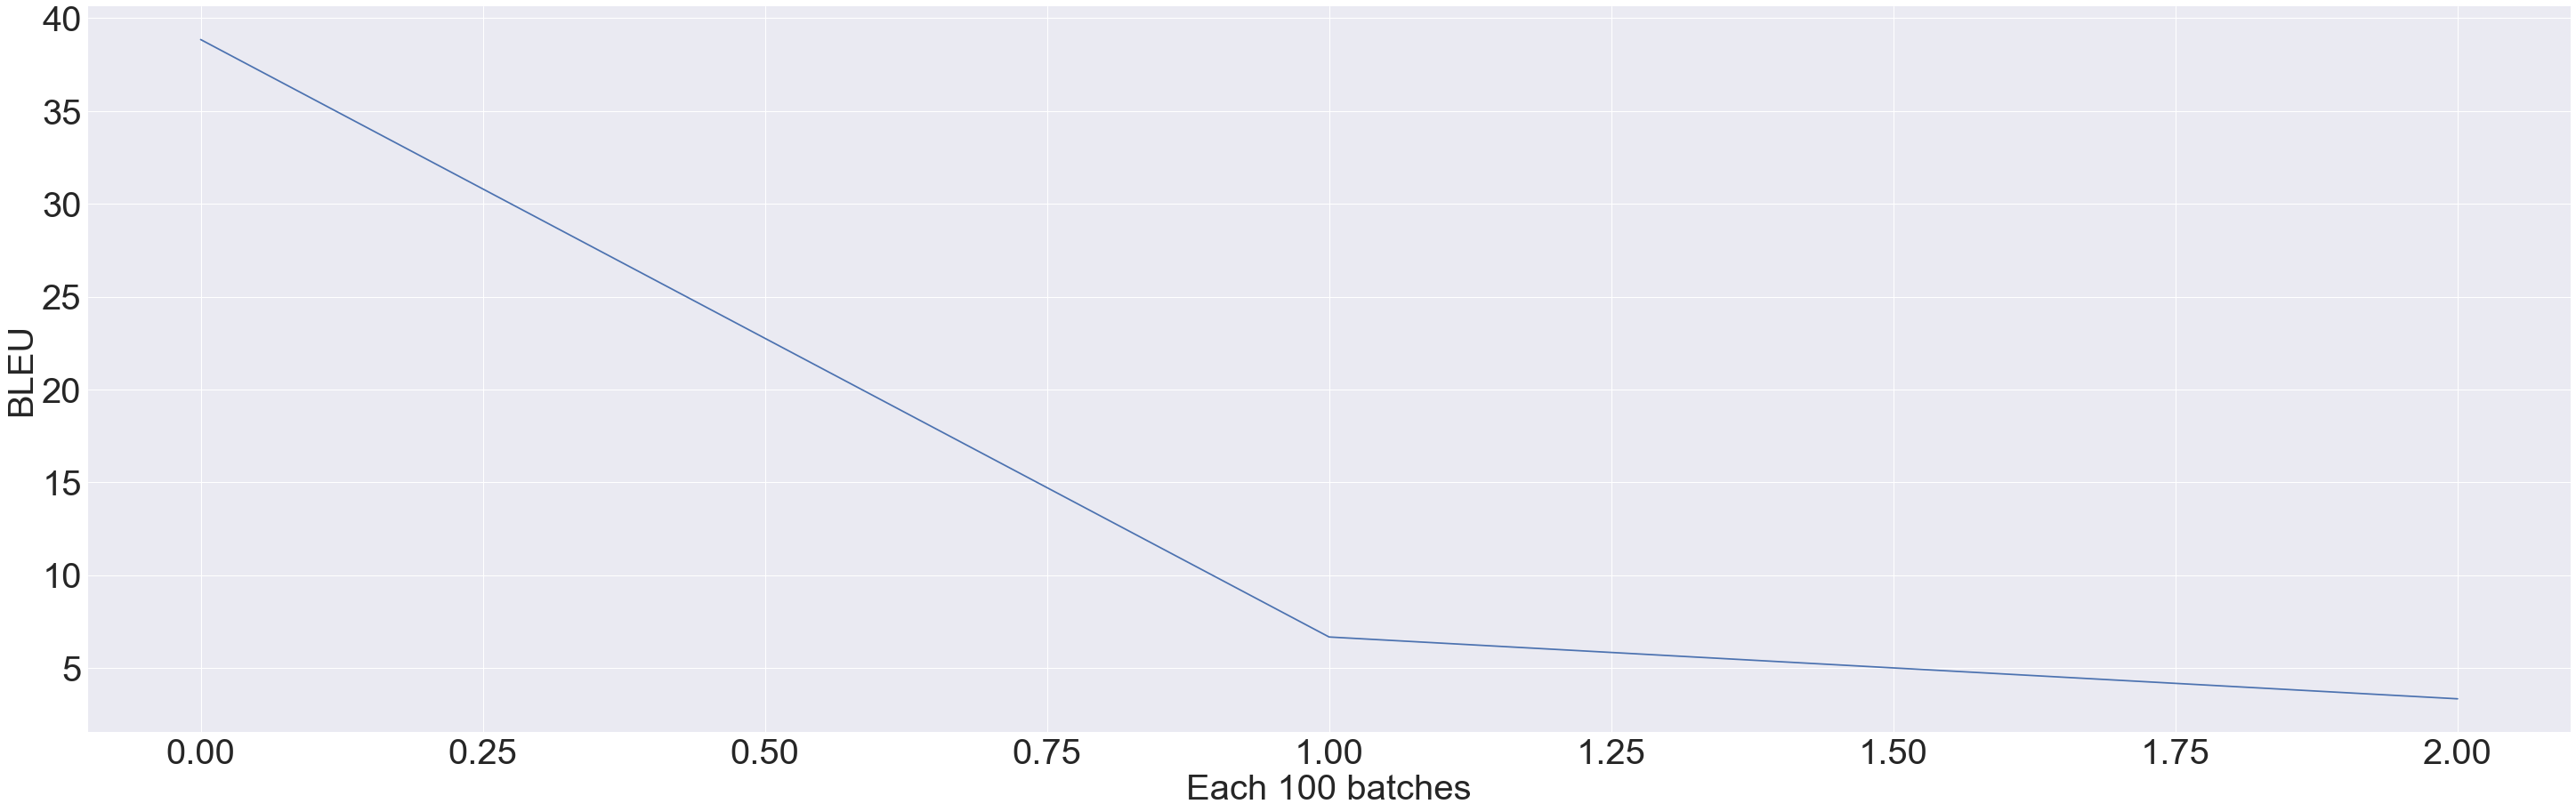

In [13]:
file = open( script_dir +"/Result/"+ "attention_GAN-e512-i512-o512-r1024-adadelta_1e+00-bs80-bleu-each100_do_d0.0-gc1-init_xavier-s1234.7.log", "rb" )
array = []
array.append(float(38.850) )
for line_ in file:
    line = line_.strip()
    
    if line == "":
        continue
    line = str(line)
    
    m = re.search('Validation(.+?) - BLEU =', line)
    if m:
        a = [s for s in line.split()]
        array.append(float(a[5][0:4]))
        
array = np.array(array)
data = pd.DataFrame(data=array, columns=['BLEU'] )
print(data)
ax = plt.subplots(figsize=(50, 15))
plt.plot(data.BLEU)

pylab.ylabel('BLEU',fontsize=40)
pylab.xlabel('Each 100 batches',fontsize=40)
plt.show()